Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 1.6132 - accuracy: 0.1333 - val_loss: 1.5944 - val_accuracy: 0.5333
Epoch 2/10
1/1 [==============================] - 0s 59ms/step - loss: 1.5916 - accuracy: 0.4667 - val_loss: 1.5719 - val_accuracy: 0.4667
Epoch 3/10
1/1 [==============================] - 0s 56ms/step - loss: 1.5700 - accuracy: 0.5333 - val_loss: 1.5487 - val_accuracy: 0.4667
Epoch 4/10
1/1 [==============================] - 0s 53ms/step - loss: 1.5475 - accuracy: 0.5333 - val_loss: 1.5240 - val_accuracy: 0.4667
Epoch 5/10
1/1 [==============================] - 0s 52ms/step - loss: 1.5235 - accuracy: 0.5333 - val_loss: 1.4970 - val_accuracy: 0.4667
Epoch 6/10
1/1 [==============================] - 0s 55ms/step - loss: 1.4971 - accuracy: 0.5333 - val_loss: 1.4670 - val_accuracy: 0.4667
Epoch 7/10
1/1 [==============================] - 0s 55ms/step - loss: 1.4675 - accuracy: 0.5333 - val_loss: 1.4329 - val_accuracy: 0.4667
Epoch 8/10
1/1 [=============

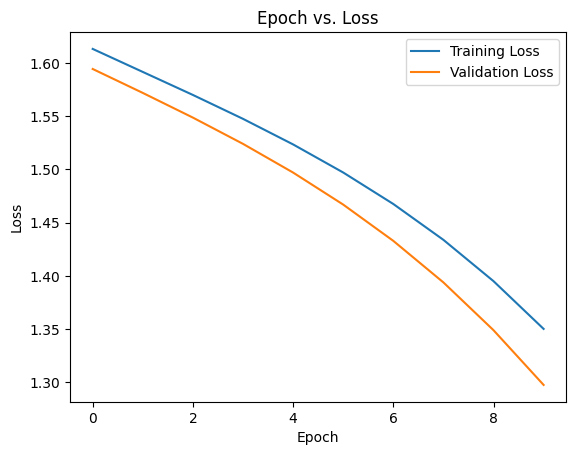

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Sample dataset (you should replace this with your NER-labeled data)
sentences = [
    "Apple Inc. is headquartered in Cupertino, California.",
    "John Smith works at Google in New York.",
    "Paris is a beautiful city in France."
]

# Sample labels (corresponding to named entities)
labels = [
    "ORG ORG O O O LOC LOC O O",
    "PER PER O O ORG O LOC LOC O",
    "LOC O O O LOC LOC LOC O"
]

# Preprocess the data
max_seq_length = 15  # Maximum sequence length
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
vocab_size = len(tokenizer.word_index) + 1

# Tokenize and pad input sequences
X = tokenizer.texts_to_sequences(sentences)
X = pad_sequences(X, maxlen=max_seq_length, padding='post')

# Tokenize labels (NER tags)
label_tokenizer = Tokenizer(filters=' ')
label_tokenizer.fit_on_texts(labels)
num_classes = len(label_tokenizer.word_index) + 1

# Tokenize and pad label sequences
y = label_tokenizer.texts_to_sequences(labels)
y = pad_sequences(y, maxlen=max_seq_length, padding='post')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the NER model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_seq_length))
model.add(LSTM(128, return_sequences=True))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Convert labels to one-hot encoded format
y_train = [tf.keras.utils.to_categorical(label, num_classes=num_classes) for label in y_train]

# Train the model and store training history
history = model.fit(X_train, np.array(y_train), epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on the test data
y_test = [tf.keras.utils.to_categorical(label, num_classes=num_classes) for label in y_test]
loss, accuracy = model.evaluate(X_test, np.array(y_test))

# Print the test loss and test accuracy
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

# Plot the epoch vs. loss graph
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs. Loss')
plt.legend()
plt.show()